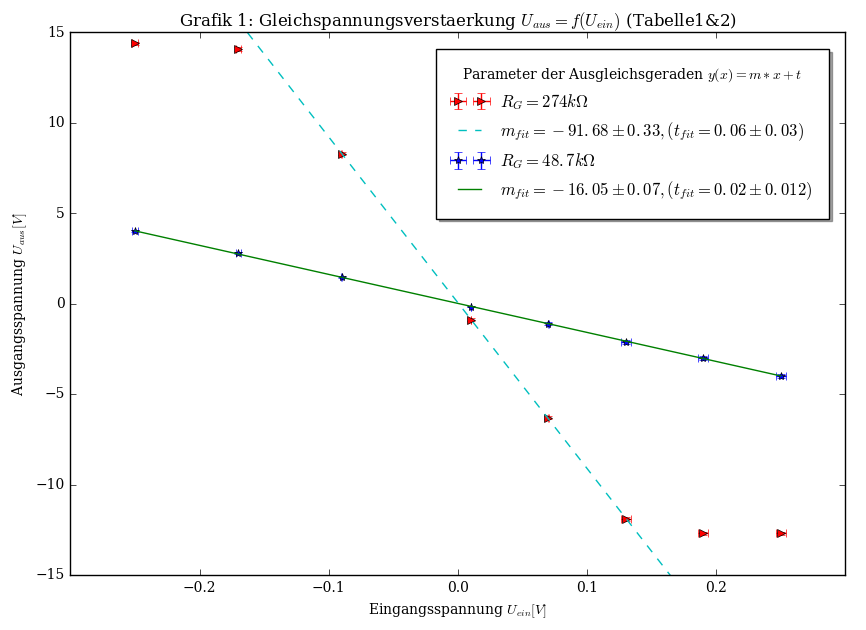

In [85]:
#Aufgabe 1a: Gleichspannungsverstärkung

#Import
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#Anpassung der Plotgröße
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 7
plt.rcParams["font.family"]='serif'

#Einlesen der Daten aus Tabelle 1&2
U_ein, ein_err, U_aus1, aus1_err, U_aus2, aus2_err = np.loadtxt('tab1,2.txt', skiprows=1, usecols=(0,1,2,3,4,5), unpack=True)

#Daten für U_ein in mV
U_ein= U_ein/1000
ein_err= ein_err/1000

#Definition der Ausgleichsgerade y=f(x)
def f(x, A, B): 
    return A*x + B

#Fitfunktion
popt1, pcov1 = curve_fit(f, U_ein, U_aus1) # Gerade 1
popt2, pcov2 = curve_fit(f, U_ein[2:-2], U_aus2[2:-2]) # Gerade 2 (für linearer Teil)

#Standardabweichung der Geradensteigung
m_1err = np.sqrt(np.diag(pcov1))
m_2err = np.sqrt(np.diag(pcov2))

#Definition des Plots
fig,ax = plt.subplots(1)

#Plot für Gerade 1
ax.errorbar(U_ein, U_aus1, linestyle='None', marker='*', label='$R_{G}=48.7 k\Omega$', xerr=ein_err, yerr=aus1_err)
ax.plot(U_ein, f(U_ein, *popt1), label='$m_{fit}=%.2f \pm%.2f, (t_{fit}=%.2f \pm%.3f)$' %(popt1[0], m_1err[0], popt1[1], m_1err[1]))

#Plot für Gerade 2
ax.errorbar(U_ein, U_aus2, linestyle='None', marker='>', label='$R_{G}=274 k\Omega$', xerr=ein_err, yerr=aus2_err)
ax.plot(U_ein, f(U_ein, *popt2), linestyle='--', label='$m_{fit}=%.2f \pm%.2f, (t_{fit}=%.2f \pm%.2f)$' %(popt2[0], m_2err[0], popt2[1], m_2err[1]))

#Sortierung der Anzeige
handles,labels = ax.get_legend_handles_labels()
handles = [handles[3], handles[1], handles[2], handles[0]]
labels = [labels[3], labels[1], labels[2], labels[0]]

#Beschriftung des Plots
plt.xlabel('Eingangsspannung $U_{ein} [V]$')
plt.ylabel('Ausgangsspannung $U_{aus} [V]$')
plt.title('Grafik 1: Gleichspannungsverstaerkung $U_{aus}=f(U_{ein})$ (Tabelle1&2)')
plt.ylim((-15,15))
plt.xlim((-0.30, 0.30))

#Sortierung der Anzeige
ax.legend(handles, labels, title='Parameter der Ausgleichsgeraden $y(x)=m*x+t$', borderpad=1, borderaxespad=1, loc='best', shadow='true')

#Speichern des Plots
plt.savefig('242_1a.jpg', dpi=300)

In [86]:
handle?

Object `handle` not found.


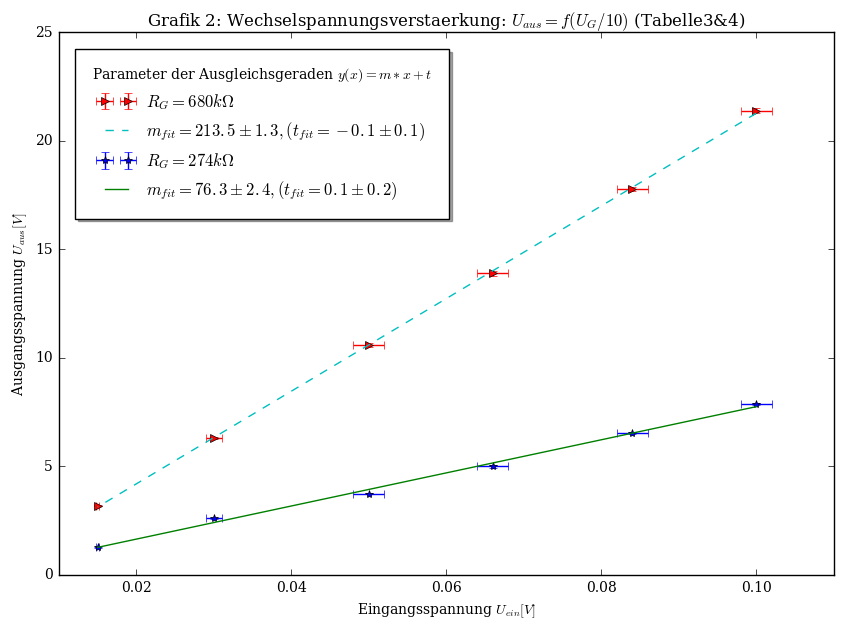

In [84]:
#Aufgabe 1b: Wechselspannungsverstärkung

#Import
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#Anpassung der Plotgröße
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 7
plt.rcParams["font.family"]='serif'

#Einlesen der Daten aus Tabelle 3&4
U_ein, ein_err, U_aus1, aus1_err, U_aus2, aus2_err = np.loadtxt('tab3,4.txt', skiprows=1, usecols=(0,1,2,3,4,5), unpack=True)

#Daten für U_ein in mV
U_ein= U_ein/1000
ein_err= ein_err/1000

# Definition der Ausgleichsgerade y=f(x)
def f(x, A, B): 
    return A*x + B

#Bester Fit an die Geraden 
popt1, pcov1 = curve_fit(f, U_ein, U_aus1) # Fit für Gerade 1
popt2, pcov2 = curve_fit(f, U_ein, U_aus2) # Fit für Gerade 2

#Standardabweichung der Geradensteigung
m_1err = np.sqrt(np.diag(pcov1))
m_2err = np.sqrt(np.diag(pcov2))

#Definition des Plots
fig,ax = plt.subplots(1)

#Plot Ausgleichsgerade 1 
ax.errorbar(U_ein, U_aus1, linestyle='None', marker='*', label='$R_{G}=274 k\Omega$', xerr=ein_err, yerr=aus1_err)
ax.plot(U_ein, f(U_ein, *popt1), label='$m_{fit}=%.1f \pm%.1f, (t_{fit}=%.1f \pm%.1f)$' %(popt1[0], m_1err[0], popt1[1], m_1err[1]))

#Plot Ausgleichsgerade 2
ax.errorbar(U_ein, U_aus2, linestyle='None', marker='>', label='$R_{G}=680 k\Omega$', xerr=ein_err, yerr=aus2_err)
ax.plot(U_ein, f(U_ein, *popt2), linestyle='--',label='$m_{fit}=%.1f \pm%.1f, (t_{fit}=%.1f \pm%.1f)$' %(popt2[0], m_2err[0], popt2[1], m_2err[1]))

#Sortierung der Anzeige
handles,labels = ax.get_legend_handles_labels()
handles = [handles[3], handles[1], handles[2], handles[0]]
labels = [labels[3], labels[1], labels[2], labels[0]]

#Beschriftung des Plots
plt.xlabel('Eingangsspannung $U_{ein} [V]$')
plt.ylabel('Ausgangsspannung $U_{aus} [V]$')
plt.title('Grafik 2: Wechselspannungsverstaerkung: $U_{aus}=f(U_{G}/10)$ (Tabelle3&4)')
ax.legend(handles, labels, title='Parameter der Ausgleichsgeraden $y(x)=m*x+t$', borderpad=1, borderaxespad=1, loc='best', shadow='true')

#Speichern des Plots
plt.savefig('242_1b.jpg', dpi=300)

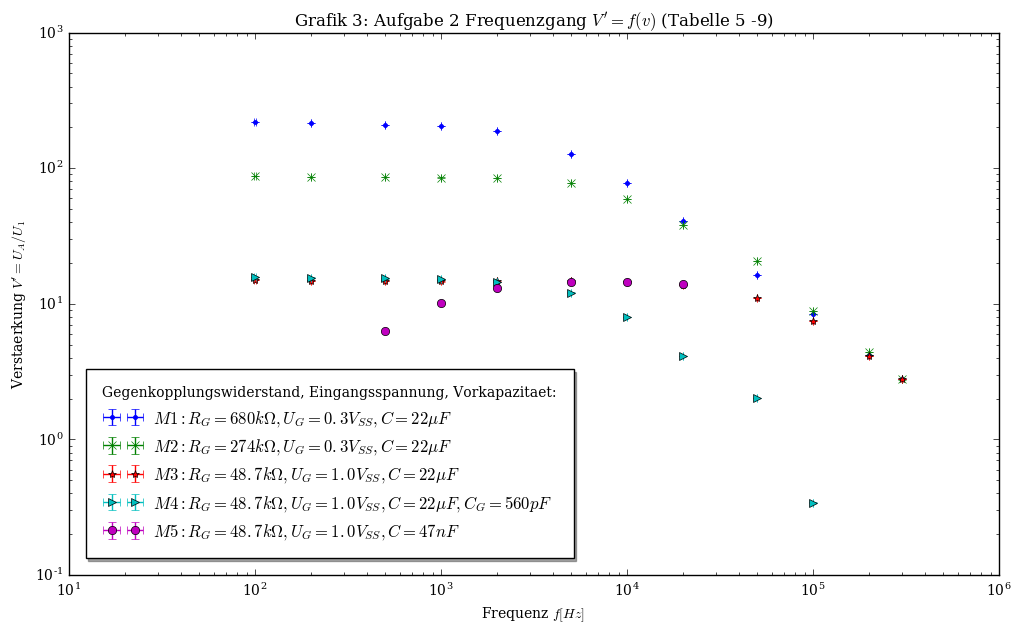

In [81]:
#Aufgabe 2 - Frequenzgang des Spannungsverstärkers

#Import
import matplotlib.pyplot as plt
import numpy as np

#Anpassung der Grafikgröße
fig_size[0] = 12
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

#Einlesen der Daten
f, f_err, U_A1, A1_err, U_A2, A2_err, U_A3, A3_err, U_A4, A4_err, U_A5, A5_err = np.loadtxt('tab5.txt', skiprows=1, usecols=(0,1,2,3,4,5,6,7,8,9,10,11), unpack=True)

#Umrechnung der zurückgesetzten Spannung
U_A1 = U_A1/0.3
U_A2 = U_A2/0.3

#Logartihmische Darstellung
plt.xscale('log')
plt.yscale('log')

#Plot der Funktionen
plt.errorbar(f, U_A1*10, linestyle='None', marker='.', label='$M1: R_{G}=680 k\Omega, U_{G}=0.3 V_{SS}, C=22 \mu F$', xerr=f_err, yerr=A1_err)
plt.errorbar(f, U_A2*10, linestyle='None', marker='x', label='$M2: R_{G}=274 k\Omega, U_{G}=0.3 V_{SS}, C=22 \mu F$ ', xerr=f_err, yerr=A2_err)
plt.errorbar(f, U_A3*10, linestyle='None', marker='*', label='$M3: R_{G}=48.7 k\Omega, U_{G}=1.0 V_{SS}, C=22 \mu F$', xerr=f_err, yerr=A3_err)
plt.errorbar(f, U_A4*10, linestyle='None', marker='>', label='$M4: R_{G}=48.7 k\Omega, U_{G}=1.0 V_{SS}, C=22 \mu F, C_{G}=560 pF$', xerr=f_err, yerr=A4_err)
plt.errorbar(f, U_A5*10, linestyle='None', marker='o', label='$M5: R_{G}=48.7 k\Omega, U_{G}=1.0 V_{SS}, C=47 nF$', xerr=f_err, yerr=A5_err)

#Beschriftung des Plots
plt.xlabel('Frequenz $f  [Hz]$ ')
plt.ylabel('Verstaerkung $V\'={U_{A}}/{U_{1}}$')
plt.title('Grafik 3: Aufgabe 2 Frequenzgang $V\'=f(v)$ (Tabelle 5 -9)')
plt.legend(title='Gegenkopplungswiderstand, Eingangsspannung, Vorkapazitaet:', borderpad=1, borderaxespad=1, loc='lower left', shadow='true')

#Speichern des Plots
plt.savefig('242_2.jpg', dpi=300)

In [ ]:
